In [94]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification


In [95]:
X, y = make_classification(
    n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1
)

In [96]:
df = pd.DataFrame(X, columns=["col1", "col2", "col3", "col4", "col5"])
df["target"] = y


In [97]:
df.shape

(100, 6)

In [98]:
df.head()

,col1,col2,col3,col4,col5,target
0,-0.114385,1.625393,-0.734188,0.881148,-0.178153,1
1,1.577110,-0.357941,0.337607,0.823404,-0.770225,0
2,0.599209,0.272870,-1.139711,1.056239,2.117166,1
3,0.321965,-0.436295,-0.935320,-1.989679,1.907014,0
4,0.841826,2.918702,-1.444993,0.837487,-1.630198,1


Function for row sampling


In [99]:
def sample_rows(df, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)

Function for column sampling

In [119]:
import random


def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    new_df = df[cols]
    new_df["target"] = df["target"]
    return new_df

Function for combined sampling


In [120]:
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)


In [102]:
# df1 = sample_rows(df, 0.1)
# df2= sample_rows(df, 0.1)
# df3 = sample_rows(df, 0.1)

In [121]:
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

/var/folders/91/j827fmz96c76zthtvg32pb1w0000gn/T/ipykernel_13302/154393802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]
/var/folders/91/j827fmz96c76zthtvg32pb1w0000gn/T/ipykernel_13302/154393802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]
/var/folders/91/j827fmz96c76zthtvg32pb1w0000gn/T/ipykernel_13302/154393802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [122]:
df1.shape

(100, 5)

In [123]:
df2.shape

(100, 5)

In [124]:
df3

,col2,col1,col4,col3,target
0,1.625393,-0.114385,0.881148,-0.734188,1
1,-0.357941,1.577110,0.823404,0.337607,0
2,0.272870,0.599209,1.056239,-1.139711,1
3,-0.436295,0.321965,-1.989679,-0.935320,0
4,2.918702,0.841826,0.837487,-1.444993,1
...,...,...,...,...,...
95,-2.960963,0.424963,-4.431645,2.270219,0
96,-0.488797,1.770018,1.635029,-2.362863,1
97,2.222064,0.953776,0.921793,0.631637,1
98,-0.621970,0.651046,1.305035,-1.017735,1


In [125]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [126]:
# random row
# clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
# clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
# clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

# random column
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.4230769230769231, 0.9166666666666666, 'x[0] <= 0.227\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.23076923076923078, 0.75, 'x[3] <= 1.012\ngini = 0.236\nsamples = 44\nvalue = [38, 6]'),
 Text(0.3269230769230769, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[0] <= -0.993\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[1] <= -0.647\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.15384615384615385, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3076923076923077, 0.25, 'x[2] <= 2.083\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.38461538461538464, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.5833333333333334, 'gini = 0.0\nsamples = 24\

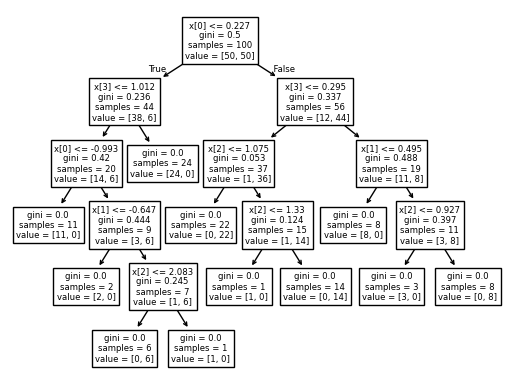

In [127]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(0.47058823529411764, 0.9285714285714286, 'x[2] <= -0.195\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.23529411764705882, 0.7857142857142857, 'x[1] <= -0.977\ngini = 0.26\nsamples = 52\nvalue = [44, 8]'),
 Text(0.3529411764705882, 0.8571428571428572, 'True  '),
 Text(0.11764705882352941, 0.6428571428571429, 'x[0] <= -0.227\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.35294117647058826, 0.6428571428571429, 'x[3] <= 0.383\ngini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.29411764705882354, 0.5, 'x[3] <= 0.339\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.23529411764705882, 0.35714285714285715, 'x[0] <= 0.481\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.29411764705882354, 0.21428571428571427, 'gi

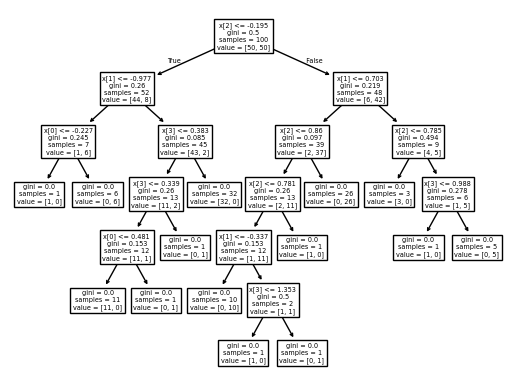

In [128]:
plot_tree(clf2)

[Text(0.47058823529411764, 0.9285714285714286, 'x[0] <= -0.195\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.23529411764705882, 0.7857142857142857, 'x[3] <= -0.977\ngini = 0.26\nsamples = 52\nvalue = [44, 8]'),
 Text(0.3529411764705882, 0.8571428571428572, 'True  '),
 Text(0.11764705882352941, 0.6428571428571429, 'x[2] <= -0.227\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17647058823529413, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.35294117647058826, 0.6428571428571429, 'x[1] <= 0.383\ngini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.29411764705882354, 0.5, 'x[2] <= 0.481\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.23529411764705882, 0.35714285714285715, 'x[1] <= 0.339\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.29411764705882354, 0.21428571428571427, 'gi

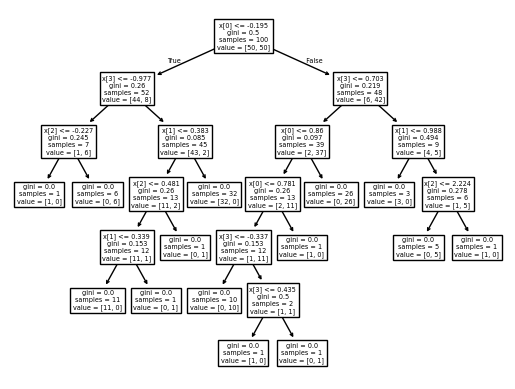

In [129]:
plot_tree(clf3)

In [ ]:
# Row predict
# clf1.predict(
#     np.array([-1.149951, -2.264081, 1.522788, -0.347368, 0.313946]).reshape(1, 5)
# )
# clf2.predict(
#     np.array([-1.149951, -2.264081, 1.522788, -0.347368, 0.313946]).reshape(1, 5)
# )
# clf3.predict(
#     np.array([-1.149951, -2.264081, 1.522788, -0.347368, 0.313946]).reshape(1, 5)
# )

In [131]:
# Column predict
clf1.predict(np.array([-0.357941, 1.577110, 0.823404, 0.337607]).reshape(1, 4))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-0.357941, 1.577110, 0.823404, 0.337607]).reshape(1, 4))
# clf3.predict(np.array([-0.357941, 1.577110, 0.823404, 0.337607]).reshape(1, 4))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [133]:
clf3.predict(np.array([-0.357941, 1.577110, 0.823404, 0.337607]).reshape(1, 4))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])